# GeoDataFrame

A **GeoDataFrame** is a data structure in GeoPandas that extends a Pandas DataFrame to handle geospatial data. It includes a special geometry column for geometric objects (points, lines, polygons) and manages coordinate reference systems (CRS). GeoDataFrames support various spatial operations and can be easily visualized, combining the functionality of Pandas with geospatial capabilities.

In [1]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# Create sample geometries
point1 = Point(1,2)
point2 = Point(2,3)
line = LineString([(3,1), (4,4), (5,2)])
polygon = Polygon([(1,1), (1,5), (5,5), (5,1)])

# Create a GeoDataFrame
data = {
    'Name': ['Point A', 'Point B', 'Line', 'Polygon'],
    'geometry': [point1, point2, line, polygon]
}

gdf = gpd.GeoDataFrame(data)
gdf

,Name,geometry
0,Point A,POINT (1 2)
1,Point B,POINT (2 3)
2,Line,"LINESTRING (3 1, 4 4, 5 2)"
3,Polygon,"POLYGON ((1 1, 1 5, 5 5, 5 1, 1 1))"


In [2]:
gdf.shape       # tuple of rows, columns

(4, 2)

In [3]:
len(gdf)    # returns total no. of rows

4

In [6]:
gdf.shape[1]

2

In [4]:
gdf.size

8

In [7]:
gdf.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
gdf.columns

Index(['Name', 'geometry'], dtype='object')

In [9]:
gdf.dtypes

,0
Name,object
geometry,geometry


In [16]:
gdf.head(2)

,Name,geometry
0,Point A,POINT (1 2)
1,Point B,POINT (2 3)


In [15]:
gdf.tail(3)

,Name,geometry
1,Point B,POINT (2 3)
2,Line,"LINESTRING (3 1, 4 4, 5 2)"
3,Polygon,"POLYGON ((1 1, 1 5, 5 5, 5 1, 1 1))"


In [17]:
gdf

,Name,geometry
0,Point A,POINT (1 2)
1,Point B,POINT (2 3)
2,Line,"LINESTRING (3 1, 4 4, 5 2)"
3,Polygon,"POLYGON ((1 1, 1 5, 5 5, 5 1, 1 1))"


In [18]:
gdf['Name']

,Name
0,Point A
1,Point B
2,Line
3,Polygon


In [20]:
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [19]:
print(type(gdf['Name']))

<class 'pandas.core.series.Series'>


In [21]:
gdf['geometry']

,geometry
0,POINT (1 2)
1,POINT (2 3)
2,"LINESTRING (3 1, 4 4, 5 2)"
3,"POLYGON ((1 1, 1 5, 5 5, 5 1, 1 1))"


In [22]:
print(type(gdf['geometry']))

<class 'geopandas.geoseries.GeoSeries'>


In [23]:
gdf.empty

False

In [25]:
# Points (representing parks)
park1 = Point(2,3)
park2 = Point(5,5)

# Lines (representing roads)
road1 = LineString([(1,1), (6,1)])
road2 = LineString([(1,2), (1,6)])
road3 = LineString([(1,5), (6,5)])

# Polygons (representing buildings)
building1 = Polygon([(1,1), (2,1), (2,2), (1,2)])
building2 = Polygon([(3,3), (5,3), (5,5), (3,5)])

data = {
    'Name': ['Park A', 'Park B', 'Road A', 'Road B', 'Road C', 'Building A', 'Building B'],
    'Type': ['Park', 'Park', 'Road', 'Road', 'Road', 'Building', 'Building'],
    'geometry': [park1, park2, road1, road2, road3, building1, building2]
}

# Create a GeoDataFrame
urban_gdf = gpd.GeoDataFrame(data)
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [28]:
urban_gdf.shape

(7, 3)

In [29]:
urban_gdf.head()

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"


In [30]:
urban_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      7 non-null      object  
 1   Type      7 non-null      object  
 2   geometry  7 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 296.0+ bytes


In [31]:
urban_gdf.dtypes

,0
Name,object
Type,object
geometry,geometry


In [33]:
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [32]:
urban_gdf['Name']

,Name
0,Park A
1,Park B
2,Road A
3,Road B
4,Road C
5,Building A
6,Building B


In [35]:
urban_gdf[['Name', 'geometry']]

,Name,geometry
0,Park A,POINT (2 3)
1,Park B,POINT (5 5)
2,Road A,"LINESTRING (1 1, 6 1)"
3,Road B,"LINESTRING (1 2, 1 6)"
4,Road C,"LINESTRING (1 5, 6 5)"
5,Building A,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [36]:
urban_gdf.Type

,Type
0,Park
1,Park
2,Road
3,Road
4,Road
5,Building
6,Building


In [38]:
urban_gdf['Type'].unique()

array(['Park', 'Road', 'Building'], dtype=object)

In [39]:
urban_gdf['Type'].nunique()

3

In [40]:
urban_gdf['Type'].value_counts()

,count
Type,
Road,3
Park,2
Building,2


In [41]:
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [42]:
urban_gdf['Type'] == 'Park'

,Type
0,True
1,True
2,False
3,False
4,False
5,False
6,False


In [46]:
# Filter gdf
urban_gdf[urban_gdf['Type']=='Road']

,Name,Type,geometry
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"


In [45]:
urban_gdf[urban_gdf['Type']!='Road']

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [48]:
urban_gdf[urban_gdf['Type']!='Road'].reset_index(drop=True)

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
3,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


With `loc`, we can use label-based slicing which includes both endpoints.

`gdf.loc['start_label' : 'end_label']`  

→ `loc[rows, columns]` (or) `loc[row_start : row_stop, col_start : col_stop]`

In [50]:
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [51]:
urban_gdf.loc[:, ['Name', 'geometry']]          # All rows and 'Name', 'geometry' columns

,Name,geometry
0,Park A,POINT (2 3)
1,Park B,POINT (5 5)
2,Road A,"LINESTRING (1 1, 6 1)"
3,Road B,"LINESTRING (1 2, 1 6)"
4,Road C,"LINESTRING (1 5, 6 5)"
5,Building A,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [53]:
urban_gdf.loc[2:4, 'Type':'geometry']

,Type,geometry
2,Road,"LINESTRING (1 1, 6 1)"
3,Road,"LINESTRING (1 2, 1 6)"
4,Road,"LINESTRING (1 5, 6 5)"


In [55]:
urban_gdf.loc[5:, :'Type']

,Name,Type
5,Building A,Building
6,Building B,Building


In [56]:
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


With `iloc`, we can use integer-based slicing which excludes the endpoint.

`gdf.iloc[start_index : end_index]`  

→ `iloc[rows, columns]` (or) `iloc[row_start : row_stop, col_start : col_stop]`

In [57]:
urban_gdf.iloc[4:]

,Name,Type,geometry
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [59]:
urban_gdf.iloc[-3:, 0]

,Name
4,Road C
5,Building A
6,Building B


In [65]:
urban_gdf.iloc[:2, [0,2]]

,Name,geometry
0,Park A,POINT (2 3)
1,Park B,POINT (5 5)


In [64]:
urban_gdf.iloc[:2, 1:]

,Type,geometry
0,Park,POINT (2 3)
1,Park,POINT (5 5)


In [66]:
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


<Axes: >

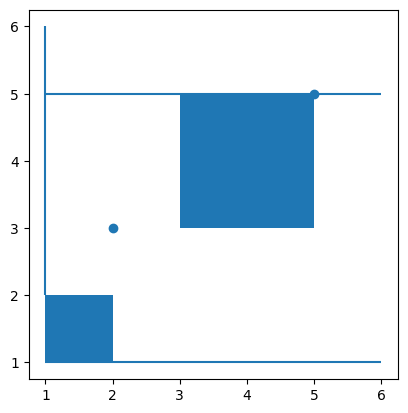

In [67]:
urban_gdf.plot()

In [68]:
urban_gdf.length

,0
0,0.0
1,0.0
2,5.0
3,4.0
4,5.0
5,4.0
6,8.0


In [70]:
# Length of roads (lines)
print("Length of roads:")
urban_gdf[urban_gdf['Type']=='Road'].length

Length of roads:


,0
2,5.0
3,4.0
4,5.0


In [73]:
# Centroid of Roads
print('Centroid of Roads:')
urban_gdf[urban_gdf['Type']=='Road'].centroid

Centroid of Roads:


,0
2,POINT (3.5 1)
3,POINT (1 4)
4,POINT (3.5 5)


In [75]:
# Area of buildings (polygons)
print('Area of buildings:')
urban_gdf[urban_gdf['Type']=='Building'].area

Area of buildings:


,0
5,1.0
6,4.0


In [76]:
urban_gdf.total_bounds

array([1., 1., 6., 6.])

In [77]:
urban_gdf

,Name,Type,geometry
0,Park A,Park,POINT (2 3)
1,Park B,Park,POINT (5 5)
2,Road A,Road,"LINESTRING (1 1, 6 1)"
3,Road B,Road,"LINESTRING (1 2, 1 6)"
4,Road C,Road,"LINESTRING (1 5, 6 5)"
5,Building A,Building,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
6,Building B,Building,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


### Distance in Geospatial Analysis

In geospatial analysis, distance refers to the measurement of space between geometries. This can be particularly useful for understanding spatial relationships, such as how close parks are to roads or buildings.

#### Example: Calculating Distance Between Park A and Road A

##### Step 1: Identify the Geometries

We have the following geometries:
- **Park A**: A point located at $(2, 3)$
- **Road A**: A line represented by the coordinates from $(1, 1)$ to $(6, 1)$

##### Step 2: Extract Geometries

We will extract the geometries from the GeoDataFrame:

- Geometry of Park A:
  $$
  \text{Park A} = (2, 3)
  $$

- Geometry of Road A:
  $$
  \text{Road A} = \text{LineString}[(1, 1), (6, 1)]
  $$

##### Step 3: Calculate the Distance

To manually calculate the distance from Park A to Road A, we find the perpendicular distance from the point to the line. The equation of a line in 2D can be represented as:

$$
Ax + By + C = 0
$$

For Road A, the coordinates $(1, 1)$ and $(6, 1)$ indicate a horizontal line. The slope $m$ is $0$, and the line equation can be written as:

$$
y = 1 \quad \text{(or rearranged to } 0x + 1y - 1 = 0 \text{)}
$$

Here:
- $A = 0$
- $B = 1$
- $C = -1$

Using the formula for the distance $d$ from a point $(x_0, y_0)$ to a line defined by $Ax + By + C = 0$:

$$
d = \frac{|Ax_0 + By_0 + C|}{\sqrt{A^2 + B^2}}
$$

Substituting the values:

- For Park A $(x_0, y_0) = (2, 3)$:

$$
d = \frac{|0 \cdot 2 + 1 \cdot 3 - 1|}{\sqrt{0^2 + 1^2}} = \frac{|3 - 1|}{\sqrt{1}} = \frac{2}{1} = 2
$$

##### Step 4: Output the Distance

The output is:

$$
\text{Distance from Park A to Road A} = 2 \text{ units}
$$

This distance calculation provides insights into how far Park A is from Road A, which can be useful for urban planning and assessing accessibility.

In [82]:
# Get the geomeries of Park A and Road A
park_a = urban_gdf.loc[urban_gdf['Name']=='Park A', 'geometry'].values[0]
road_a = urban_gdf.loc[urban_gdf['Name']=='Road A', 'geometry'].values[0]

# Caclculate the distance between Park A and Road A
distance = park_a.distance(road_a)
print(f"Distance between Park A and Road A is {distance} units.")

Distance between Park A and Road A is 2.0 units.


In [83]:
# Get the geomeries of Park B and Road A
park_b = urban_gdf.loc[urban_gdf['Name']=='Park B', 'geometry'].values[0]
road_a = urban_gdf.loc[urban_gdf['Name']=='Road A', 'geometry'].values[0]

# Caclculate the distance between Park A and Road A
distance = park_b.distance(road_a)
print(f"Distance between Park B and Road A is {distance} units.")

Distance between Park B and Road A is 4.0 units.


In [93]:
# Define distance threshold
distance_threshold = 1

# Filter parks
parks = urban_gdf[urban_gdf['Type']=='Park']

# Filter Roads
roads = urban_gdf[urban_gdf['Type']=='Road']

# Find nearby parks
nearby_parks = parks.geometry.apply(
    lambda park: any(road.distance(park) < distance_threshold for road in roads.geometry)
    )

# Print the names of neaby parks
print(f'Parks within the distance of {distance_threshold} unit:', parks.loc[nearby_parks, 'Name'].to_list())

Parks within the distance of 1 unit: ['Park B']
